In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
df = pd.read_csv('../../data/processed/job_data_v2.csv')

print(f"Data Loaded: {df.shape}")
print(f"Fraud Rate: {df['fraudulent'].mean()*100:.2f}%")

Data Loaded: (17880, 9)
Fraud Rate: 4.84%


C:\Users\nagar\AppData\Local\Temp\ipykernel_25368\761062997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraudulent', y='text_length', data=df, palette='Set2', ax=axes[0])


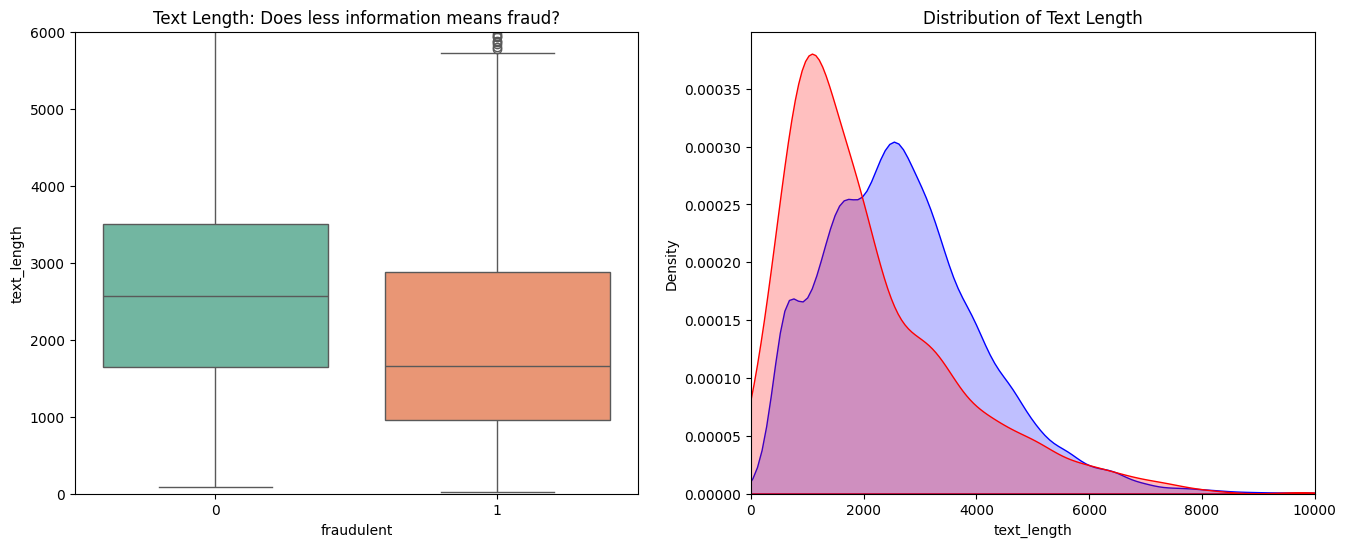

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='fraudulent', y='text_length', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Text Length: Does less information means fraud?')
axes[0].set_ylim(0, 6000)

# KDE Plot for distribution shape
sns.kdeplot(data=df[df['fraudulent']==0]['text_length'], color='blue', label='Real', fill=True, ax=axes[1])
sns.kdeplot(data=df[df['fraudulent']==1]['text_length'], color='red', label='Fake', fill=True, ax=axes[1])
axes[1].set_title('Distribution of Text Length')
axes[1].set_xlim(0, 10000)
plt.show()

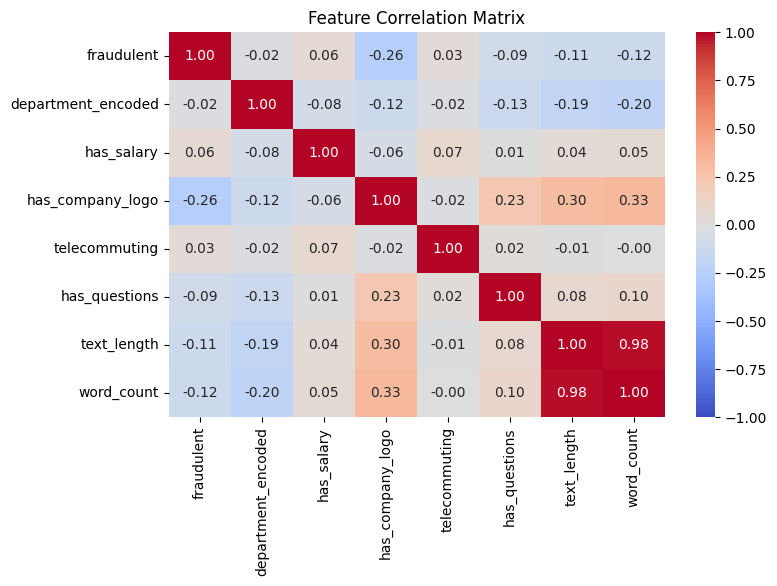

In [17]:
plt.figure(figsize=(8,5))
corr = df.corr(method='spearman', numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

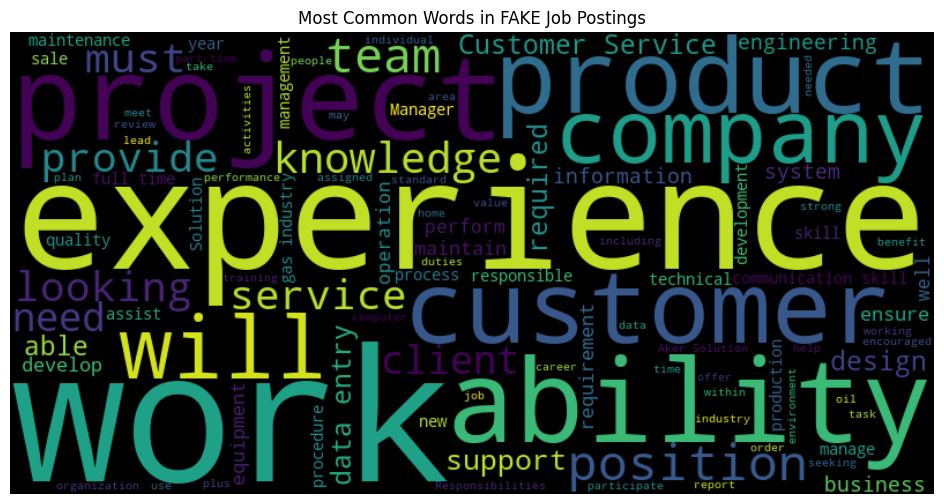

In [18]:
fake_text = " ".join(df[df['fraudulent'] == 1]['full_text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100).generate(fake_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in FAKE Job Postings')
plt.show()